In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = "serif"
import copy

# create grid


In [2]:
grid = np.zeros((3,4))
state_value_grid = np.zeros((3,4)) # state vale grid
grid[0][3] = 1 # goal state
grid[1][3] = -1 # death state
grid[1][1] = 2 # block

In [357]:
# add exploring start
# add action_value 
class Gridworld():
    def __init__(self, step_cost=-0.1, max_ep_length=400, es=False):
        self.grid = np.zeros((3,4))
        self.grid[0][3] = 1 # goal state
        self.grid[1][3] = -1 # death state
        self.grid[1][1] = 2 # block
        self.exploring_starts = es
        self.goal_state = 3
        self.death_state = 7
        self.state = 8
        self.done = False
        self.max_ep_length=max_ep_length
        self.steps = 0
        self.step_cost = step_cost
        self.possible_actions = [0,1,2,3] # 0 = up, 1 = right, 2 = down, 3 = left
        self.action_space = 4
        self.coord_state_translation = {"[0, 0]":0, "[0, 1]":1, "[0, 2]":2, "[0, 3]":3,
                           "[1, 0]":4, "[1, 1]":5, "[1, 2]":6, "[1, 3]":7,
                           "[2, 0]":8, "[2, 1]":9, "[2, 2]":10, "[2, 3]":11}
        self.state_coord_translation = {"0":[0, 0], "1":[0, 1], "2":[0, 2], "3":[0, 3],
                           "4":[1, 0], "5":[1, 1], "6":[1, 2], "7":[1, 3],
                           "8":[2, 0], "9":[2, 1], "10":[2, 2], "11":[2, 3]}
    

    def reset(self):
        self.done = False
        self.steps = 0
        self.grid = np.zeros((3,4))
        self.grid[0][3] = 1 # goal state
        self.grid[1][3] = -1 # death state
        self.grid[1][1] = 2 # block
        if self.exploring_starts:
            self.state = np.random.choice([0,1,2,4,6,8,9,10,11])
        else:
            self.state = 8
        return self.state
    
    def get_next_state(self, current_position, action):

        next_state = self.state_coord_translation[str(current_position)].copy()
        
        if action == 0 and next_state[0] != 0 and next_state != [2, 1]:
            # go up
            next_state[0] -= 1
        elif action == 1 and next_state[1] != 3 and next_state != [1, 0]:
            # go right
            next_state[1] += 1
        elif action == 2 and next_state[0] != 2 and next_state != [0, 1]:
            # go down
            next_state[0] += 1
        elif action == 3 and next_state[1] != 0 and next_state != [1, 2]:
            # go left
            next_state[1] -= 1
        else:
            pass
        return self.coord_state_translation[str(next_state)]
            
    
    def step(self, action):
        assert action in self.possible_actions, "Action not in action space!"
        
        current_position = self.state
        #print("state", current_position)
        next_state = self.get_next_state(current_position, action)
        #print("action", action)
        #print("ns",next_state)
        
        self.steps += 1
        
        if next_state == self.goal_state:
            reward = 1
            self.done = True
            
        elif next_state == self.death_state:
            reward = -1
            self.done = True
        else:
            reward = self.step_cost
        
        if self.steps == self.max_ep_length:
            self.done = True
            
        self.state = next_state
        return next_state, reward, self.done
    
def plot_state_value_grid(state_value_grid):
    """ Plots the State_Value_Grid """
    plt.figure(figsize=(10,5))
    p=sns.heatmap(state_value_grid, cmap='coolwarm', annot=True, fmt=".1f",annot_kws={'size':16},square=True)
    p.set_ylim(len(state_value_grid)+0.01, -0.01) # because of seaborn problem 
    
def quatromatrix(left, bottom, right, top, ax=None, triplotkw={},tripcolorkw={}):

    if not ax: ax=plt.gca()
    n = left.shape[0]; m=left.shape[1]

    a = np.array([[0,0],[0,1],[.5,.5],[1,0],[1,1]])
    tr = np.array([[0,1,2], [0,2,3],[2,3,4],[1,2,4]])

    A = np.zeros((n*m*5,2))
    Tr = np.zeros((n*m*4,3))

    for i in range(n):
        for j in range(m):
            k = i*m+j
            A[k*5:(k+1)*5,:] = np.c_[a[:,0]+j, a[:,1]+i]
            Tr[k*4:(k+1)*4,:] = tr + k*5

    C = np.c_[ left.flatten(), bottom.flatten(), 
              right.flatten(), top.flatten()   ].flatten()

    triplot = ax.triplot(A[:,0], A[:,1], Tr, **triplotkw)
    tripcolor = ax.tripcolor(A[:,0], A[:,1], Tr, facecolors=C, **tripcolorkw)
    return tripcolor

# First-visit MC prediction

for estimating V ~ v_pi

In [277]:
max_episodes = 2000
env = Gridworld(step_cost=-0.1,max_ep_length=50)
Returns = {"0":[], "1":[], "2":[], "3":[],
           "4":[], "5":[], "6":[], "7":[],
           "8":[], "9":[], "10":[], "11":[]}
state_value_grid = np.zeros(12) # state vale grid
state_value_grid[3] = 1 # Goal
state_value_grid[7] = -1 # Death
g = 0.99
for ep in range(max_episodes):
    G = 0
    state
    state = env.reset()

    trajectory = []
    while True:        
        action = np.random.randint(4) #random policy
        #print("action", action)
        next_state, reward, done = env.step(action)
        trajectory.append((state, reward))
        
        state = next_state
        if done:
            break

    for step in reversed(trajectory):
        
        G = g*G + step[1]
        Returns[str(step[0])].append(G)
        state_value_grid[step[0]] = np.mean(Returns[str(step[0])])



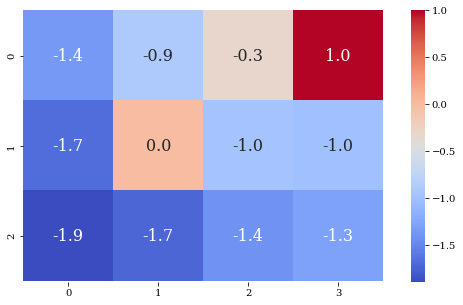

In [243]:
plot_state_value_grid(state_value_grid.reshape((3,4)))

# Monte Carlo ES (Exploring Starts)

In [360]:
max_episodes = 3000
env = Gridworld(step_cost=-0.1,max_ep_length=40, es=True)
action_value_grid = np.zeros((12,4))
action_value_grid[3]=1
action_value_grid[7]=-1

possible_states = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
possible_actions = ["0", "1", "2", "3"]
Returns = {}
for state in possible_states:
    for action in possible_actions:
        Returns[state+", "+action] = []
        
g = 0.99
for ep in range(max_episodes):
    G = 0
    
    state = env.reset()
    trajectory = []
    while True:
        action = np.random.randint(4) #random policy
        #action = np.argmax(action_value_grid[state])
        next_state, reward, done = env.step(action)
        trajectory.append((state, action, reward))
        
        state = next_state
        if done:
            break

    for step in reversed(trajectory):
        G = g*G + step[2]
        Returns[str(step[0])+", "+str(step[1])].append(G)
        action_value_grid[step[0]][step[1]] = np.mean(Returns[str(step[0])+", "+str(step[1])])


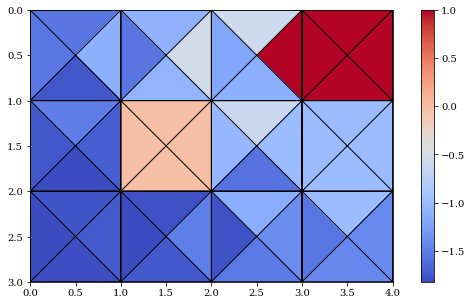

In [364]:
top=action_value_grid[:,0].reshape((3,4))
right=action_value_grid[:,1].reshape((3,4))
bottom=action_value_grid[:,2].reshape((3,4))
left=action_value_grid[:,3].reshape((3,4))


fig, ax=plt.subplots(figsize=(10,5))
ax.set_ylim(3, 0)
tripcolor = quatromatrix(left, top, right, bottom, ax=ax,
             triplotkw={"color":"k", "lw":1},
             tripcolorkw={"cmap": "coolwarm"}) 

ax.margins(0)
ax.set_aspect("equal")
fig.colorbar(tripcolor)
plt.show()

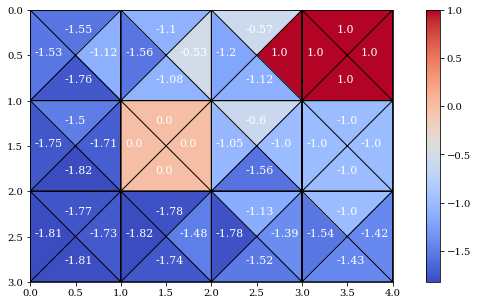

In [387]:
top=action_value_grid[:,0].reshape((3,4))
top_value_positions = [(0.38,0.25),(1.38,0.25),(2.38,0.25),(3.38,0.25),
                       (0.38,1.25),(1.38,1.25),(2.38,1.25),(3.38,1.25),
                       (0.38,2.25),(1.38,2.25),(2.38,2.25),(3.38,2.25)]
right=action_value_grid[:,1].reshape((3,4))
right_value_positions = [(0.65,0.5),(1.65,0.5),(2.65,0.5),(3.65,0.5),
                       (0.65,1.5),(1.65,1.5),(2.65,1.5),(3.65,1.5),
                       (0.65,2.5),(1.65,2.5),(2.65,2.5),(3.65,2.5)]
bottom=action_value_grid[:,2].reshape((3,4))
bottom_value_positions = [(0.38,0.8),(1.38,0.8),(2.38,0.8),(3.38,0.8),
                       (0.38,1.8),(1.38,1.8),(2.38,1.8),(3.38,1.8),
                       (0.38,2.8),(1.38,2.8),(2.38,2.8),(3.38,2.8)]
left=action_value_grid[:,3].reshape((3,4))
left_value_positions = [(0.05,0.5),(1.05,0.5),(2.05,0.5),(3.05,0.5),
                       (0.05,1.5),(1.05,1.5),(2.05,1.5),(3.05,1.5),
                       (0.05,2.5),(1.05,2.5),(2.05,2.5),(3.05,2.5)]


fig, ax=plt.subplots(figsize=(12,5))
ax.set_ylim(3, 0)
tripcolor = quatromatrix(left, top, right, bottom, ax=ax,
             triplotkw={"color":"k", "lw":1},
             tripcolorkw={"cmap": "coolwarm"}) 

ax.margins(0)
ax.set_aspect("equal")
fig.colorbar(tripcolor)

for i, (xi,yi) in enumerate(top_value_positions):
    plt.text(xi,yi,round(top.flatten()[i],2), size=11, color="w")
for i, (xi,yi) in enumerate(right_value_positions):
    plt.text(xi,yi,round(right.flatten()[i],2), size=11, color="w")
for i, (xi,yi) in enumerate(left_value_positions):
    plt.text(xi,yi,round(left.flatten()[i],2), size=11, color="w")
for i, (xi,yi) in enumerate(bottom_value_positions):
    plt.text(xi,yi,round(bottom.flatten()[i],2), size=11, color="w")

plt.show()